This document demonstrates various customization techniques:

* **Colors, Linestyles, Markers:** Setting visual properties of plotted lines and points.
* **Text & Annotations:** Adding descriptive text and annotations with arrows using `ax.text()` and `ax.annotate()`. `LaTeX` support is mentioned.
* **Ticks & Tick Labels:** Manually setting tick locations (`ax.set_xticks`, `ax.set_yticks`) and labels (`ax.set_xticklabels`, `ax.set_yticklabels`), and customizing their appearance (`ax.tick_params`). The `ticker` module is mentioned for advanced formatting.
* **Spines:** Controlling the visibility, color, and position of the plot borders.
* **Axis Scales & Limits:** Setting axis limits (`ax.set_xlim`, `ax.set_ylim`) and scale (`ax.set_yscale`).
* **Legends:** Customizing the legend's location, appearance, and title.
* **Grid Lines:** Customizing the grid's appearance.
* **Stylesheets:** Mentioning `plt.style.use()` for applying pre-defined visual themes (like `'ggplot'`, `'seaborn-v0_8-darkgrid'`, etc.).
* **Figure Background:** Setting the background color of the entire figure.

These options allow you to create highly polished and informative visualizations tailored to your specific needs.

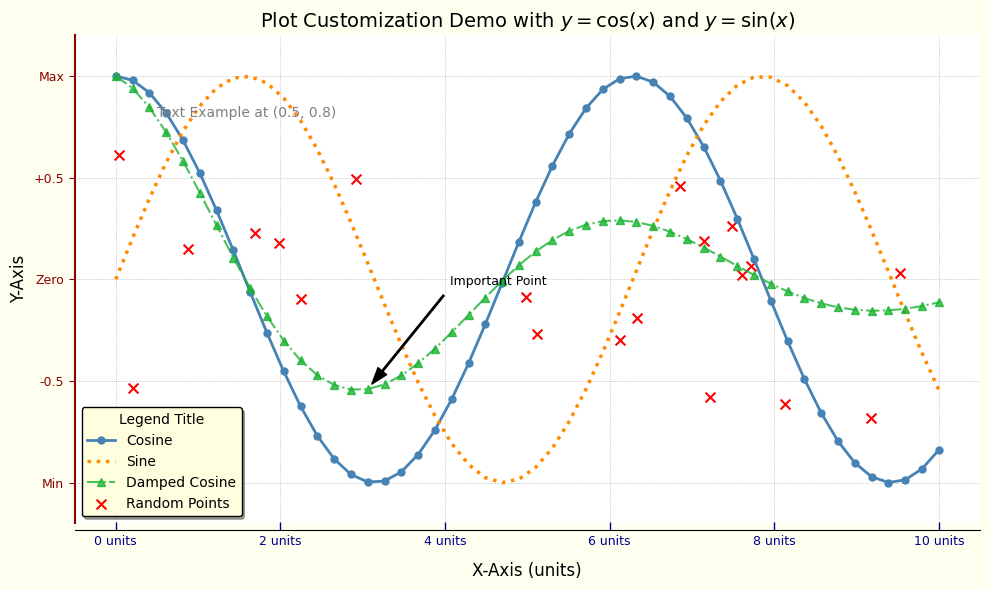

Generated customized plot.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # For advanced tick formatting
import numpy as np
import pandas as pd

# --- 1. Prepare Sample Data ---
np.random.seed(10)
x = np.linspace(0, 10, 50)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = y1 * np.exp(-x / 5)
scatter_x = np.random.rand(20) * 10
scatter_y = np.random.rand(20) * 1.5 - 0.75


# --- 2. Create Figure and Axes ---
fig, ax = plt.subplots(figsize=(10, 6))


# --- 3. Colors, Linestyles, Markers ---
# These can often be set directly in plot commands, but also afterwards.

# Plotting with various styles
line1, = ax.plot(x, y1, color='steelblue', linestyle='-', linewidth=2, marker='o', markersize=5, label='Cosine')
line2, = ax.plot(x, y2, color='#FF8C00', linestyle=':', linewidth=2.5, marker='', label='Sine') # Hex color, no marker
line3, = ax.plot(x, y3, color=(0.1, 0.7, 0.2, 0.8), linestyle='-.', linewidth=1.5, marker='^', markersize=6, label='Damped Cosine') # RGBA tuple

# Scatter plot points
ax.scatter(scatter_x, scatter_y, color='red', marker='x', s=50, label='Random Points') # s is size


# --- 4. Text and Annotations ---

# ax.text(x, y, string, **kwargs) - Add text at arbitrary location (data coordinates)
ax.text(0.5, 0.8, 'Text Example at (0.5, 0.8)', fontsize=10, color='gray')

# ax.annotate(text, xy=(arrow_tip_x, arrow_tip_y), xytext=(text_x, text_y), arrowprops=dict(...))
# Add text with an arrow pointing to a specific location
ax.annotate('Important Point',
            xy=(x[15], y3[15]), # Point the arrow points to
            xytext=(x[15] + 1, y3[15] + 0.5), # Location of the text
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=9,
            horizontalalignment='left',
            verticalalignment='bottom')

# Using LaTeX for mathematical notation (if LaTeX is installed and configured)
# Requires prefixing string with 'r' and using $...$
ax.set_title(r'Plot Customization Demo with $y = \cos(x)$ and $y = \sin(x)$', fontsize=14)


# --- 5. Ticks, Tick Labels, and Spines ---

# a) Setting Ticks manually
ax.set_xticks(np.arange(0, 11, 2)) # Set x-ticks every 2 units
ax.set_yticks([-1, -0.5, 0, 0.5, 1]) # Set specific y-ticks

# b) Setting Tick Labels
ax.set_xticklabels([f'{val} units' for val in ax.get_xticks()], rotation=30, ha='right') # Custom labels with rotation
ax.set_yticklabels(['Min', '-0.5', 'Zero', '+0.5', 'Max'])

# c) Using Tick Formatters (more advanced)
# Format y-axis ticks as percentages
# ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0)) # Example if y-axis was 0-1

# d) Customizing Tick Appearance (major ticks)
ax.tick_params(axis='x', direction='in', length=6, width=1, colors='darkblue', labelsize=9)
ax.tick_params(axis='y', direction='out', length=4, width=0.8, colors='darkred', labelsize=9)

# e) Spines (the lines bounding the plot area)
ax.spines['top'].set_visible(False) # Hide top spine
ax.spines['right'].set_visible(False) # Hide right spine
ax.spines['left'].set_color('darkred') # Color left spine
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_position(('outward', 5)) # Move bottom spine outward


# --- 6. Axis Scales and Limits ---
ax.set_xlim(-0.5, 10.5) # Set limits slightly outside data range
ax.set_ylim(-1.2, 1.2)
# ax.set_yscale('log') # Example: Set y-axis to logarithmic scale


# --- 7. Legends ---
# Customize legend location, appearance, title
ax.legend(loc='lower left', # Best location guess: 'best'
          fontsize='medium',
          shadow=True,
          frameon=True, # Draw frame around legend
          facecolor='lightyellow',
          edgecolor='black',
          title='Legend Title',
          title_fontsize='10')


# --- 8. Grid Lines ---
ax.grid(True, which='major', axis='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.7)
# which='minor' or 'both' can be used if minor ticks are enabled/set


# --- 9. Stylesheets ---
# Apply pre-defined styles for overall look-and-feel
# Note: This usually affects *subsequent* plots or needs to be set before plotting.
# plt.style.use('seaborn-v0_8-darkgrid') # Example: Apply a style
# print(f"Available styles: {plt.style.available}")
# To apply to this specific plot, would need to create fig/ax *after* setting style.


# --- 10. Final Touches ---
ax.set_xlabel("X-Axis (units)", fontsize=12, labelpad=10) # labelpad adds padding
ax.set_ylabel("Y-Axis", fontsize=12)
fig.patch.set_facecolor('ivory') # Set figure background color


# --- Display Plot ---
plt.tight_layout() # Adjust plot to prevent labels overlapping
plt.show()

print("Generated customized plot.")

# --- Example using a style ---
# with plt.style.context('ggplot'):
#     fig_style, ax_style = plt.subplots()
#     ax_style.plot(x, y1, marker='o')
#     ax_style.plot(x, y2, marker='^')
#     ax_style.set_title("Plot with 'ggplot' Style")
#     plt.show()
# print("Generated plot using 'ggplot' style context.")

